In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("ignore")

# Read File
df = pd.read_csv('data_telco_customer_churn.csv')

In [2]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from category_encoders import BinaryEncoder, OrdinalEncoder

# Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import EditedNearestNeighbours

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (f1_score, confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay)

# Miscellaneous
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Chapter 1: Introduction

## Background

In the highly competitive mobile telecommunications industry, understanding customer churn is crucial. Customer churn, or attrition, occurs when clients switch to a different service provider. This is often due to dissatisfaction with service, competitive offers, or personal changes.

The "Telco Customer Churn" dataset provides insights into the profiles of customers who have left a telecom company. It includes data on **'Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'tenure', 'monthly charges' and 'Churn'**. The main focus is on the 'Churn' attribute, indicating whether a customer has ended their service.

A telecom provider aims to reduce churn by predicting which customers are likely to leave using machine learning. This predictive model will help the provider to develop strategies to retain customers and reduce churn.
<br>

> The cost of acquiring new customers is five times higher than the cost of retaining existing customers. While acquisition allows you to increase the amount of customers you have, customer retention allows you to maximize the value of customers you have already captured. https://www.optimove.com/resources/learning-center/customer-acquisition-vs-retention-costs#:~:text=The%20cost%20of%20acquiring%20new,customers%20you%20have%20already%20captured.

> Thus, we can assume the retention cost is **$1** and Acquisition Cost is **$5**

## Problem Statement

 Our main goal is to figure out why customers are leaving a telecom company and to build a model that can predict which customers might leave next. The big question we try to answer is, `What makes a customer want to leave, and how can we spot them before they go?` By doing this, we aim to help companies keep their customers for a longer time and save company's money. 

## Project Objective

To maximize cost efficiency, the company aims to focus on targeted customers (those potentially at risk of churning) by increasing `Recall Score`. The approach involves:

1. The company wants to **predict which customers are likely to churn**. This will enable them to concentrate their efforts on targeted customers who are at risk of churning.

2. The company wants to **identify the factors that influence customer retention**. This knowledge will help them develop more targeted programs to reduce the number of customers who churn.

3. The company wants to know **how much savings can be achieved** with the implementation of a machine learning model.

## Defining Target and Matrix

Target:

0 : Not Churn (Retained)

1 : Churn (Turnover)

- True Positives (TP) = Prediction: `churn` and actual: `churned` 
- True Negatives (TN) = Prediction: `not churn` and actual: `not churned`
- `False Positives (FP)` =  Prediction: `churn` and actual: `not churned`
- `False Negatives (FN)`=   Prediction: `not churn` and actual: `churned`

*In the context of customer churn, both types of errors can be costly for the business:*

- False Positives (FP): These are customers mistakenly identified as likely to churn. Although resources spent on them might seem wasted, this can unexpectedly boost their satisfaction and loyalty. **The company loss  $ 1 for regularly retention cost**

- False Negatives (FN): These are customers who actually churn but were not identified as at-risk. Missing these customers is more problematic as it leads to direct revenue loss and missed opportunities for service improvement. **The company will loss their CAC as much as  $ 5 for acquiring**

> Reducing False Negatives (FN) is crucial in business, as it's more cost-effective to retain existing customers than acquire new ones. Focusing on accurately identifying customers at risk of churning aligns with a cost-efficient Customer Retention Strategy, ultimately saving resources and enhancing business sustainability.

> We will utilize `Recall` as the primary metric for model evaluation, and the effectiveness of the **Customer Retention Cost Strategy** will guide our selection of the most suitable model for this project.

## **Project Flowchart**
1. Introduction

1. Data Understanding

1. Data Wrangling

1. Data Preprocessing
    - MinMaxScaler : We apply MinMaxScaler to scale numerical data because the distribution is not normal and there are no outliers.
    - One-Hot Encoding : We use one-hot encoding for categorical data to convert categories into a numerical format that can be used in our models.

1. Machine Learning Model Benchmark<br>
    a. Model Banchmarking
    - Logistic Regression
    - K-Nearest Neighbors
    - Decision Tree
    - XGBoost
    - Gradient Boosting
    - Random Forest
    - LGBMClassifier
    - CatBoostClassifier
    - AdaBoostClassifier

    b. Addressing Imbalance with Resample benchmarking<br>
    - RandomOverSampler
    - RandomUnderSampler
    - SMOTE
    - Near Miss
    - SMOTEENN 
    - EditedNearestNeighbours

1. Applying to Test Data

    After identifying the top five performers from the modeling and resampling phase, we apply each model and resampling method to predict outcomes on the test data and evaluate the prediction scores.

1. Hyperparameter Tuning with Grid Search

    We conduct hyperparameter tuning using Grid Search on the **best-performing model and resampling method** based on the test data results.

1. Final Model 

1. Conclusion
1. Recomendation


# Chapter 2: Data Set & Data Understanding

To address the problem mentioned above, we are using dataset available from the TIBM data_telco_customer_churn. The dataset used is as follows:<br>
| Key              | Description                                                   |
|------------------|---------------------------------------------------------------|
| Dependents       |  Whether the customer has dependents or not.                  |
| Tenure           |  Number of months the customer has   stayed with the company. |
| OnlineSecurity   |  Whether the customer has online   security or not.           |
| OnlineBackup     |  Whether the customer has online   backup or not.             |
| InternetService  |  Whether the client is subscribed   to Internet service.      |
| DeviceProtection |  Whether the client has device   protection or not.           |
| TechSupport      |  Whether the client has tech   support or not                 |
| Contract         |  Type of contract according to   duration.                    |
| PaperlessBilling |  Bills issued in paperless form.                              |
| MonthlyCharges   |  Amount of charge for service on   monthly bases.             |
| Churn            |  Whether the customer churns or   not.                        |


In [3]:
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


## Table Shape Information

In [4]:
print(f'df shape: {df.shape}')
pd.DataFrame(
    {
    'column': df.columns.values,
    'dtype': df.dtypes.values,
    'n_missing_values': df.isna().sum(),
    '%_missing_value': df.isna().sum()/df.shape[0] * 100,
    'neg_value': [int((df[col] < 0).sum()) if (df[col].dtype == int or df[col].dtype == float) else 0 for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique()[:10] for col in df.columns]
    }
)

df shape: (4930, 11)


,column,dtype,n_missing_values,%_missing_value,neg_value,n_unique,sample_unique
Dependents,Dependents,object,0,0.0,0,2,"[Yes, No]"
tenure,tenure,int64,0,0.0,0,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47]"
OnlineSecurity,OnlineSecurity,object,0,0.0,0,3,"[No, Yes, No internet service]"
OnlineBackup,OnlineBackup,object,0,0.0,0,3,"[No, Yes, No internet service]"
InternetService,InternetService,object,0,0.0,0,3,"[DSL, Fiber optic, No]"
DeviceProtection,DeviceProtection,object,0,0.0,0,3,"[Yes, No internet service, No]"
TechSupport,TechSupport,object,0,0.0,0,3,"[Yes, No, No internet service]"
Contract,Contract,object,0,0.0,0,3,"[Month-to-month, Two year, One year]"
PaperlessBilling,PaperlessBilling,object,0,0.0,0,2,"[Yes, No]"
MonthlyCharges,MonthlyCharges,float64,0,0.0,0,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7,..."


> Based on the table above, we can see that there is no missing values in the columns<br>

## Descriptive Statistical Checking
The purpose of descriptive statistical checking is to identify any data anomalies

In [5]:
display(df.describe(), df.describe(include='object'))

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3446,2445,2172,2172,2186,2467,2721,2957,3614


## EDA

### Checking Data Distribution

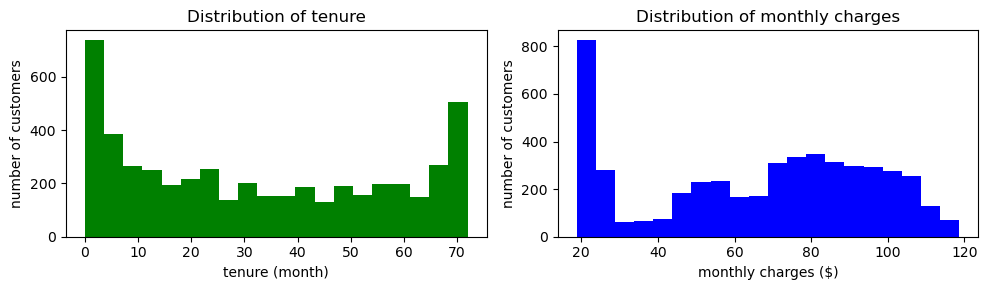

In [6]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.hist(df['tenure'], bins=20, color='green')
plt.title('Distribution of tenure')
plt.xlabel('tenure (month)')
plt.ylabel('number of customers')
plt.subplot(1, 2, 2)
plt.hist(df['MonthlyCharges'], bins=20, color='blue')
plt.title('Distribution of monthly charges')
plt.xlabel('monthly charges ($)')
plt.ylabel('number of customers')
plt.tight_layout()
plt.show()

> Based on the graphs above, data distribution is not normal. 
<br> we will apply `scaling method` ,Specifically, we will use `MinMaxScaller`

### Checking Outlier

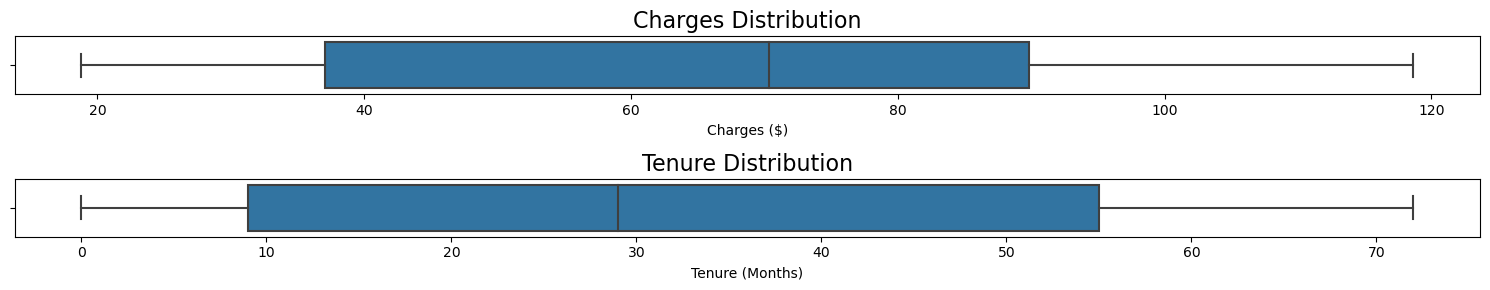

In [7]:
plt.figure(figsize=(15, 3))

# Subplot 1 for MonthlyCharges
plt.subplot(2, 1, 1)  # 1 row, 2 columns, subplot 1
sns.boxplot(data=df, x='MonthlyCharges')
plt.xlabel('Charges ($)')
plt.title('Charges Distribution', fontsize=16)

# Subplot 2 for tenure
plt.subplot(2, 1, 2)  # 1 row, 2 columns, subplot 2
sns.boxplot(data=df, x='tenure')
plt.xlabel('Tenure (Months)')
plt.title('Tenure Distribution', fontsize=16)

plt.tight_layout()  # Adjusts subplot params so that subplots fit into the figure area
plt.show()

> Based on the boxplot above, there is `no missing value` in the dataset

### Checking Target Balance

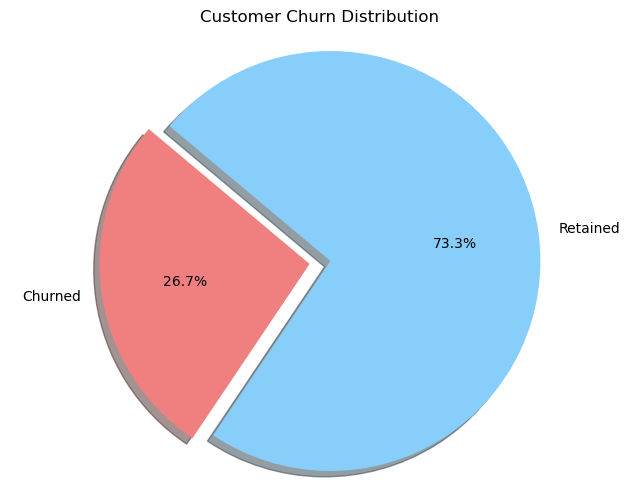

In [8]:
import matplotlib.pyplot as plt
# Calculate the churn percentage
churn_counts = df['Churn'].value_counts(normalize=True) * 100
churn_percentage = churn_counts['Yes']

churn_percentage
    
# Creating a pie chart for the churn distribution
labels = 'Churned', 'Retained'
sizes = [churn_percentage, 100 - churn_percentage]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Customer Churn Distribution')
plt.show()

> Data is imbalanced, it requires imbalance handling machine learning modeling. We will analyze other features further by comparing them with the percentage of churn.

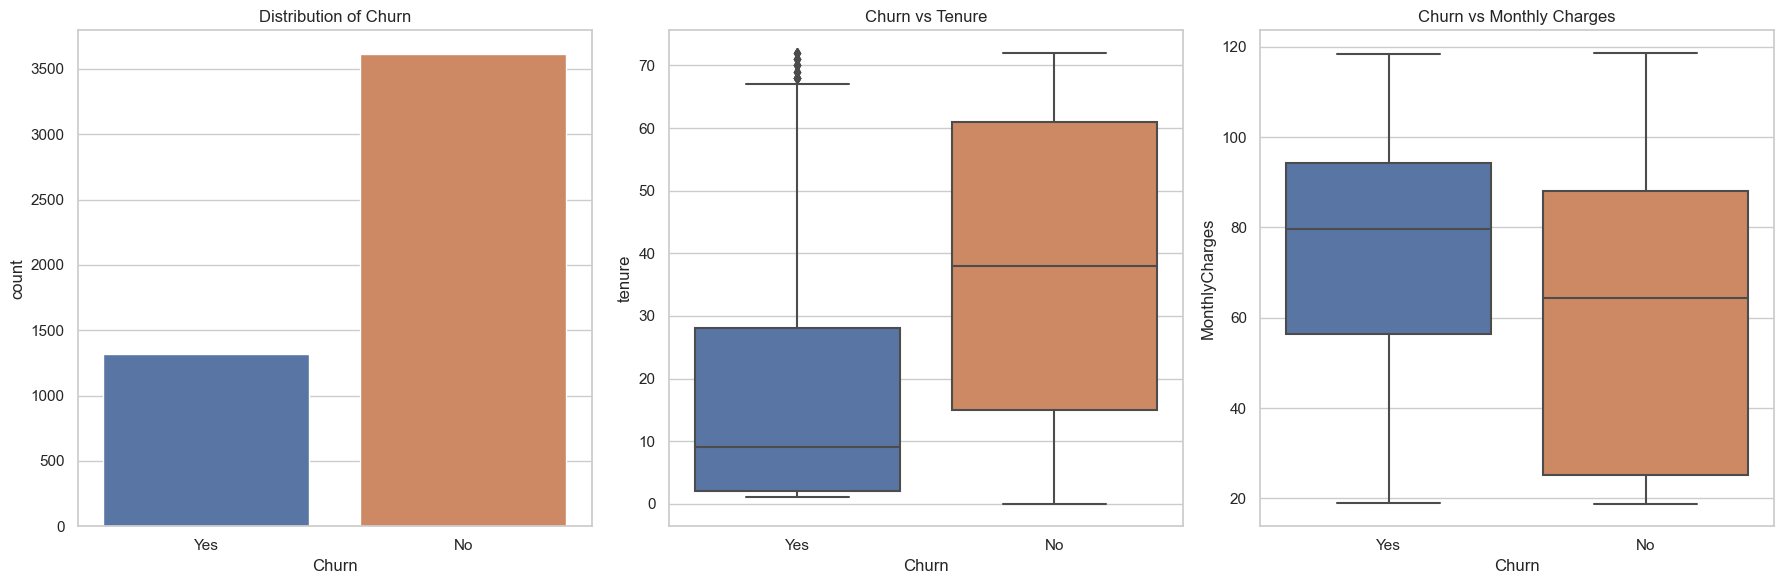

,Churn,tenure,MonthlyCharges
Churn,1.000000,-0.362734,0.193099
tenure,-0.362734,1.000000,0.240244
MonthlyCharges,0.193099,0.240244,1.000000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for plots
sns.set(style="whitegrid")

# Creating subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Distribution of Churn
sns.countplot(x='Churn', data=df, ax=ax[0])
ax[0].set_title('Distribution of Churn')

# Churn vs Tenure
sns.boxplot(x='Churn', y='tenure', data=df, ax=ax[1])
ax[1].set_title('Churn vs Tenure')

# Churn vs Monthly Charges
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=ax[2])
ax[2].set_title('Churn vs Monthly Charges')

plt.tight_layout()
plt.show()

# Calculating correlation of 'Churn' with numerical variables
# Converting 'Churn' to a numerical value for correlation calculation
data_corr = df.copy()
data_corr['Churn'] = data_corr['Churn'].map({'Yes': 1, 'No': 0})
correlation = data_corr[['Churn', 'tenure', 'MonthlyCharges']].corr()

correlation


>Based on the ` Churn vs Tenure` graphs above , churning customer happened when they just started to subscibe. <br>
Based on the ` Churn vs Monthly charges` graphs above , churning customer happened when the `monthly charges` is relatively expensive<br>

### Percentage of Churn by Monthly Charge Ranges and Tenure

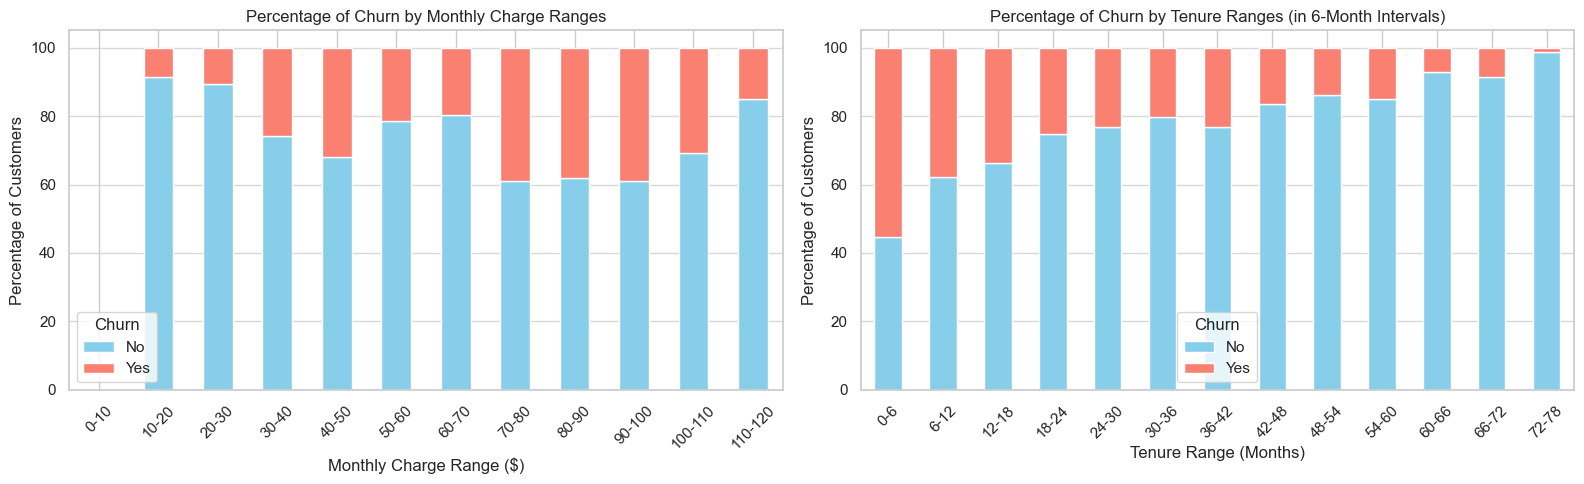

In [11]:
# Creating bins for Monthly Charges and Tenure
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
bin_labels = [f"{i}-{i + 10}" for i in bins[:-1]]
tenure_bins = [0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78]
tenure_bin_labels = [f"{i}-{i + 6}" for i in tenure_bins[:-1]]

# Re-assigning the MonthlyChargeBin and TenureBin columns with correct labels
df1 = df.copy()  # Resetting to the original dataset
df1['MonthlyChargeBin'] = pd.cut(df1['MonthlyCharges'], bins=bins, labels=bin_labels, right=False)
df1['TenureBin'] = pd.cut(df1['tenure'], bins=tenure_bins, labels=tenure_bin_labels, right=False)

# Regrouping data for both Monthly Charges and Tenure
grouped_monthly_data = df1.groupby(['MonthlyChargeBin', 'Churn']).size().unstack(fill_value=0)
grouped_monthly_data_percentage = grouped_monthly_data.div(grouped_monthly_data.sum(axis=1), axis=0) * 100

grouped_tenure_data = df1.groupby(['TenureBin', 'Churn']).size().unstack(fill_value=0)
grouped_tenure_data_percentage = grouped_tenure_data.div(grouped_tenure_data.sum(axis=1), axis=0) * 100

# Plotting both histograms as subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

# Monthly Charges subplot
grouped_monthly_data_percentage.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=axes[0])
axes[0].set_title('Percentage of Churn by Monthly Charge Ranges')
axes[0].set_xlabel('Monthly Charge Range ($)')
axes[0].set_ylabel('Percentage of Customers')
axes[0].legend(title='Churn', labels=['No', 'Yes'])
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.75)

# Tenure subplot
grouped_tenure_data_percentage.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=axes[1])
axes[1].set_title('Percentage of Churn by Tenure Ranges (in 6-Month Intervals)')
axes[1].set_xlabel('Tenure Range (Months)')
axes[1].set_ylabel('Percentage of Customers')
axes[1].legend(title='Churn', labels=['No', 'Yes'])
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()


> For Churn by Monthly Charges

1. **Mid to High Price Ranges:** Higher churn rates observed, indicating customers in the $70-$100 range might switch due to perceived lower value or competitive offers.

2. **Lowest and Highest Price Brackets:** Lower churn rates suggest a loyal customer base

3. **Stability in Lower Price Ranges:** Customers paying up to $60 show lower churn, likely satisfied with basic or moderately priced services.

> For Churn by Tenure

1. **Early Tenure Churn**: Higher churn in the first 12 months indicates new customers are more likely to leave, possibly due to unmet expectations or better competitor offers.

2. **Reduced Churn with Longer Tenure**: Churn rates decrease as tenure increases, showing that long-term customers tend to be more loyal and satisfied.

3. **Loyalty in Long-term Customers**: Very low churn in customers with over 60 months of tenure suggests a strong base of loyal, satisfied customers.


### Percentage of Churn by Categorical Features

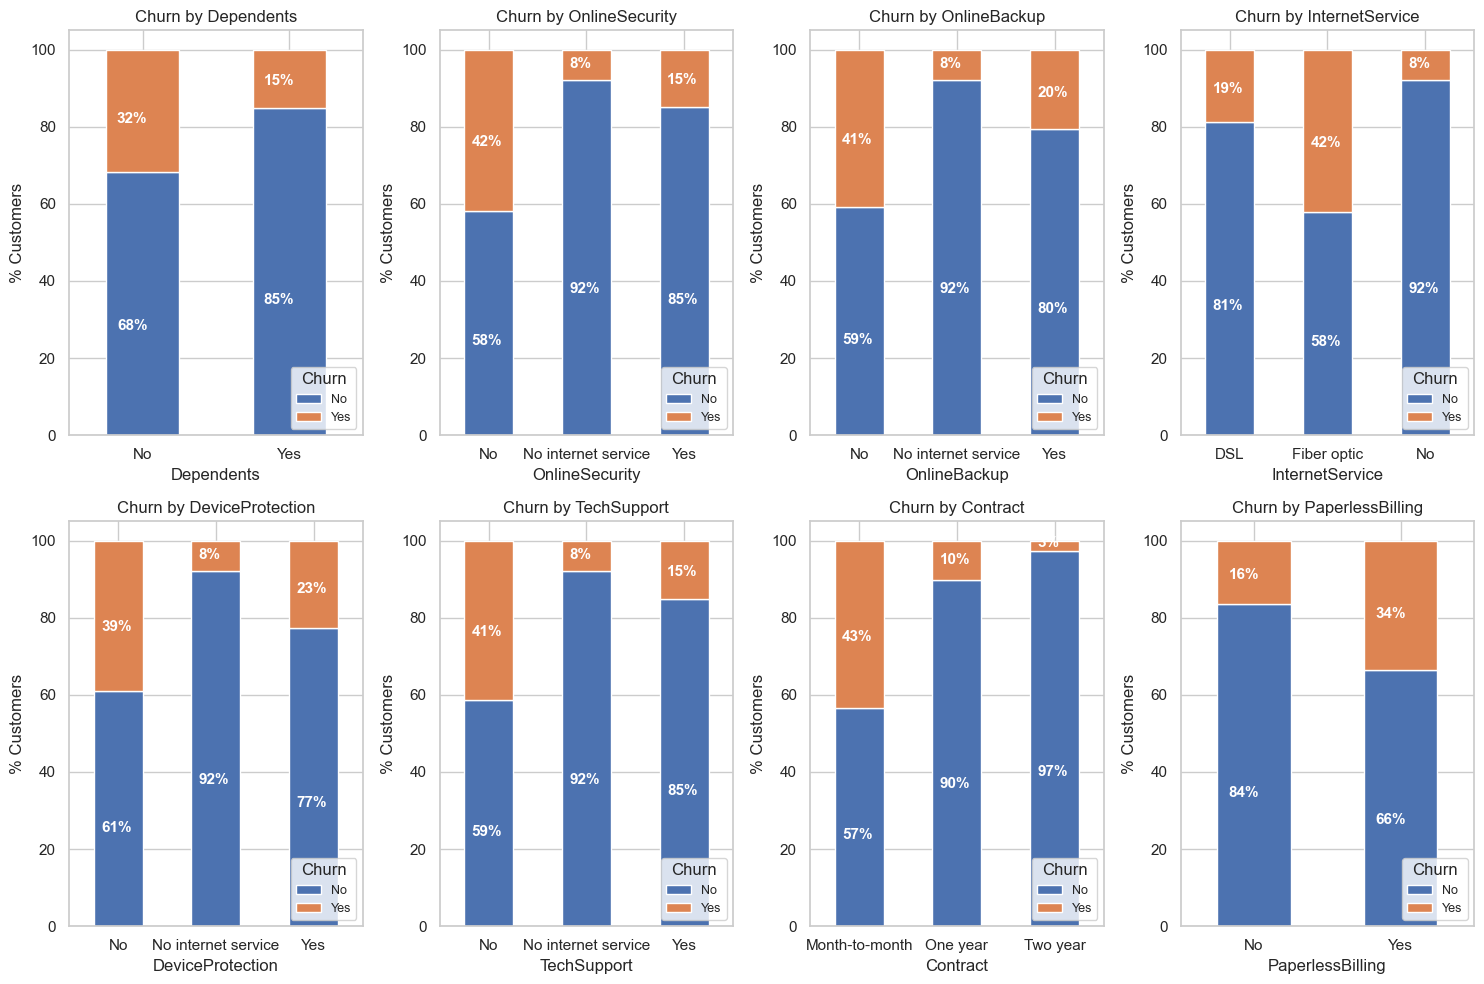

In [12]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
plt.figure(figsize=(15, 10))
plotnumber = 1

for feature in cat_features[:-1]:

        column1 = feature

        # create a new subplot for every source
        groupby_table = df.groupby([column1,'Churn']).size().unstack()

        # Label data
        def show() :
            if height > 0 :
                return '{:.0f}%'.format(height)
            else :
                return '' 
        
        # subplot
        ax = plt.subplot(2, 4, plotnumber)
        
        # Harga rumah berdasarkan feature 
        (groupby_table.T*100.0 / groupby_table.T.sum()).T.plot(kind='bar',
                                                                width = 0.5,
                                                                stacked = True,
                                                                rot = 0, 
                                                                ax = ax,)

        ax.legend(loc = 'lower right', prop={'size':9},title = 'Churn')
        ax.set_ylabel('% Customers')
        ax.set_title(f'Churn by {column1}',size = 12)

        # labeling the bars
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax.annotate(show(), (p.get_x()+0.15*width, p.get_y()+.4*height),
                        color = 'white',
                        weight = 'bold',
                        size = 11)
        
        plt.tight_layout();
        
        plotnumber += 1

>1. Customers with month-to-month contracts are more likely to discontinue their subscriptions (churn) compared to other types of contracts. 
>2. Customers who do not subscibe OnlineSecurity,Online Backup, DeviceProtection, and Tech Support are more likely to discontinue the subscription (churn)

#  **Chapter 3: Data Wrangling**
>Since there are no outliers and missing values, the data wrangling in this project will focus on handling duplicate data.

## Handling Duplicate Data

In [13]:
print ('n duplicate =', df.duplicated().sum(), '\n')           # Check Duplicate Data
print('percentage', df['Churn'].value_counts() / len(df) * 100)            # Percentage of the "target" before dropping duplicated data

n duplicate = 77 

percentage Churn
No     73.306288
Yes    26.693712
Name: count, dtype: float64


In [14]:
df = df.drop_duplicates(keep='first')                                                  # Drop Duplicate Data
print ('n duplicate =', df.duplicated().sum(), '\n')           # Check Duplicate Data
print('percentage', df['Churn'].value_counts() / len(df) * 100)            # Percentage of the "target" before dropping duplicated data

n duplicate = 0 

percentage Churn
No     73.459716
Yes    26.540284
Name: count, dtype: float64


> Dropping Duplicate data is not affecting the percentage of the `target` feature since the percentage is low

# **Chapter 4: Data PreProcessing**

## Encoding:

To encode the categorical features, we will use the One Hot Encoding method on the columns **'Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', and 'Churn'**. One Hot Encoding is suitable here because:

1. These features are non-ordinal, meaning there is no meaningful order among the categories within the features.
2. The number of unique values (unique data) in each feature is limited.

In One Hot Encoding, each category within a feature is transformed into a new column, and each row is assigned a value of 1 or 0 depending on whether that category appears in the row or not. This process is effective for machine learning models that may struggle to understand relationships in categorical data.

## Scaller:

MinMaxScaler is selected for scaling the tenure and MonthlyCharges features due to their non-normal distribution and the absence of outliers. This scaler is effective in such scenarios because it linearly transforms the data by scaling each feature to a given range, typically between 0 and 1. By doing so, it preserves the shape of the dataset's distribution and does not distort the relative distances between the values. This approach is particularly beneficial when dealing with features that do not conform to a normal distribution and are free from extreme value distortions like outliers.

## Transformer

In [15]:
# Create Transformer
transformer = ColumnTransformer([
    ('min_max_scaler', MinMaxScaler(), ['tenure', 'MonthlyCharges']),
    # ('pipe_ordinal_scale', pipe_ordinal_scale, ['Contract']),
    ('onehot', OneHotEncoder(drop='first'), ['Contract','Dependents', 'OnlineSecurity', 'InternetService', 'OnlineBackup','DeviceProtection', 'TechSupport', 'PaperlessBilling']),
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('min_max_scaler', MinMaxScaler(),
                                 ['tenure', 'MonthlyCharges']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['Contract', 'Dependents', 'OnlineSecurity',
                                  'InternetService', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport',
                                  'PaperlessBilling'])])

## Target Encoding

In [16]:
# mapping churn into 1 and 0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

## Splitting Data

In [17]:
X = df.drop(columns=['Churn']) # Features
y = df['Churn'] # Target

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25, # 25% of the data will be used for testing
    random_state=2024,  # Random state is fixed so that the train and test data do not change
    stratify=y # Maintain the proportion of each class
)

In [18]:
transformer.fit(X_train) # Fit the transformer to training data

ColumnTransformer(remainder='passthrough',
                  transformers=[('min_max_scaler', MinMaxScaler(),
                                 ['tenure', 'MonthlyCharges']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['Contract', 'Dependents', 'OnlineSecurity',
                                  'InternetService', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport',
                                  'PaperlessBilling'])])

# **Chapter 5: Benchmarking**

## Model Benchmarking
> For initial model benchmarking, we will evaluate nine different types of models, which include::

1. **Logistic Regression**, is a type of statistical analysis that employs a logistic function to predict a binary outcome based on one or more predictor variables. It yields the likelihood that a specific input corresponds to a particular category. This likelihood is then converted into a binary decision using a cutoff value (for example, if the predicted probability exceeds 0.5, it is assigned to category 1; if not, to category 0).

1. **K-Nearest Neighbors**, is an algorithm in machine learning that does not rely on underlying parametric assumptions and is based on instances. It categorizes a data element by considering the predominant category among its K closest neighbors within the space of features. This method calculates the distance from the focal data point to all others, identifies the K closest points, and then allocates the target point the class label that is most frequently observed among these neighboring points.

1. **Decision Trees**, categorize the dataset into smaller sections according to the input variables' values, with each division at the nodes being determined by the value that optimally reduces a specific metric (such as Gini impurity or entropy). This division is repeatedly executed, forming a decision model akin to a tree structure. In this model, every trajectory from the tree's base to a leaf node delineates a chain of decisions, ultimately leading to a determined class label.

1. **XGBoost**, stands for a collective learning technique that constructs numerous simple learners, often in the form of decision trees, in a sequential process. In this approach, each successive tree aims to rectify the inaccuracies of its predecessor. Central to its methodology is the gradient boosting framework, which focuses on diminishing a loss function through the progressive integration of new tree predictions into the collective model.

1. **Gradient Boosting**, refers to a method in ensemble learning where a sequence of weak learners, usually decision trees, are constructed. Each tree in the sequence is designed to address the errors made by the preceding tree. The technique focuses on reducing a loss function by progressively incorporating the predictions of new trees into the ensemble. This process is steered by the gradient of the loss function.

1. **Random Forest**, is a type of ensemble learning technique that works by creating numerous decision trees during the training phase. For classification tasks, it outputs the class that represents the most common outcome among the individual trees, whereas for regression tasks, it calculates the average prediction from all the trees. This method of aggregating predictions from multiple decision trees helps in diminishing overfitting and enhances the overall accuracy. Due to its ability to reduce overfitting while maintaining high accuracy, Random Forest is considered a strong and adaptable machine learning algorithm suitable for a diverse array of data situations.

1. **AdaBoost (Adaptive Boosting)** is an ensemble technique that combines multiple weak learners (typically decision trees) to form a strong classifier. It works by iteratively adjusting the weights of misclassified instances so they are more likely to be correctly classified in the next iteration.

1. **CatBoost (Categorical Boosting)** is an algorithm for gradient boosting on decision trees

1. **LightGBM (Light Gradient Boosting Machine)** is a gradient boosting framework that uses tree-based learning algorithms and is designed for distributed and efficient training, particularly on large datasets.

In [19]:
# Define models
logreg = LogisticRegression(random_state=2024)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=2024)
rf = RandomForestClassifier(random_state=2024)
ada = AdaBoostClassifier(random_state=2024)
grad = GradientBoostingClassifier(random_state=2024)
cat = CatBoostClassifier(verbose=False,random_state=2024)
xgb = XGBClassifier(random_state=2024)
lgbm = LGBMClassifier(random_state=2024)

# Define model names
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Adaboost', 'Gradboost', 'Catboost', 'XGBoost', 'LightGBM']
# Define models
models = [logreg,knn,tree,rf,ada,grad,cat,xgb,lgbm]
score=[]
rata=[]
std=[]

# Looping for each model
for i in models:
    skfold=StratifiedKFold(n_splits=5) # 5-fold cross-validation
    estimator=Pipeline([
        ('preprocess',transformer), 
        ('model',i)])   
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='recall')  # Recall is used as the evaluation metric
    score.append(model_cv)  
    rata.append(model_cv.mean()*100)
    std.append(model_cv.std())

[LightGBM] [Info] Number of positive: 773, number of negative: 2138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 356
[LightGBM] [Info] Number of data points in the train set: 2911, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265544 -> initscore=-1.017347
[LightGBM] [Info] Start training from score -1.017347
[LightGBM] [Info] Number of positive: 773, number of negative: 2138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 356
[LightGBM] [Info] Number of data points in the train set: 2911, number of used features: 16
[LightGBM] [Info] [binary:Bo

In [20]:
pd.DataFrame({'model':model_names,'mean recall':rata,'sdev':std}).set_index('model').sort_values(by='mean recall',ascending=False) 

,mean recall,sdev
model,,
Logistic Regression,53.724160,0.016255
LightGBM,53.721489,0.027131
Gradboost,53.621067,0.021306
Catboost,53.000908,0.016157
Decision Tree,52.067731,0.015976
Adaboost,51.241387,0.036353
XGBoost,50.929438,0.028992
Random Forest,47.613375,0.039633
KNN,46.893863,0.021244


> The Logistic Regression model takes the lead in predicting customer churn with the highest recall score, signaling its superior ability to accurately identify customers at risk of leaving. It's followed closely by the LightGBM and Gradboost models, while the Catboost, Decision Tree, and Adaboost models show commendable but slightly lower recall scores. At the bottom of the list, the Random Forest and KNN models lag in recall, suggesting they may be less effective for churn prediction in this particular analysis. This ranking highlights the effectiveness of Logistic Regression as a pivotal tool for businesses aiming to preemptively address customer churn.

## Resampling Benchmarking

> Resampling methods are applied due to the imbalance in the target classes (0 for 'Not Churn' and 1 for 'Churn'). We will apply resampling methods to each of the nine models previously mentioned. This approach aims to create a more balanced distribution of the classes, which should enhance model performance. The resampling techniques we will use include:

1. **Random Under Sampling** Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out. Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.
1. **Random Over Sampling** Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with. A condition to consider when undersampling is that it can cause overfitting and poor generalization to your test set.
This technique generates synthetic data for the minority class.
1. **SMOTE (Synthetic Minority Oversampling Technique)** is a technique that works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.
1. **NearMiss**: is an under-sampling technique that selects examples from the majority class based on their average distance to the three nearest neighbors in the minority class, aiming to provide a balanced dataset.
1. **ENN (Edited Nearest Neighbour** is an under-sampling technique aimed at improving classification quality in imbalanced datasets by removing samples from the majority class that are close to the minority class.)
1. **SMOTEENN (SMOTE + Edited Nearest Neighbors)**: A Combination between over-sampling of the minority class using SMOTE with cleaning of the majority class using Edited Nearest Neighbors to provide a balanced and noise-free dataset.

In [21]:
# Define imbalance treatment methods
ros = RandomOverSampler(random_state=2024)
rus = RandomUnderSampler(random_state=2024)
smote = SMOTE(random_state=2024)
near = NearMiss()
smoteen = SMOTEENN(random_state=2024)
enn = EditedNearestNeighbours()

# Dictionary models 
models = {'KNN': knn,
          'Logistic Regression':logreg,
          'Decision Tree': tree,
          'XGBoost' : xgb,
          'Random Forest' : rf,
          'Gradient Boosting' : grad,
          'Ada Boosting' : ada,
          'Cat Boosting' : cat,
          'LightGBM' : lgbm
          }

# Dictionary resampling method 
resamples = {
    'none': None,
    'ros': ros,
    'rus': rus,
    'smote': smote,
    'enn': enn,
    'near miss': near,
    'smoteenn': smoteen
}

# Dictionary metrics 
metrics = {'balanced_accuracy': 'balanced_accuracy',
           'precision': 'precision',
           'recall': 'recall',
              'f1': 'f1',}

In [22]:
# Original lists to store results
test_accuracy_arr = []
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
list_model = []
list_resample = []

# New list to store recall before resampling
test_recall_no_resample_arr = []

# Function to calculate recall without resampling
def calculate_recall_no_resampling(model, X_train, y_train):
    crossval_no_resample = StratifiedKFold(n_splits=5)
    estimator_no_resample = Pipeline([
        ('transform', transformer),
        ('model', model),
    ])
    scores_no_resample = cross_validate(estimator_no_resample, X_train, y_train, cv=crossval_no_resample, scoring='recall')
    return scores_no_resample['test_score'].mean() * 100

# Iterate over all models, resampling, and cross-validate method
for name_resample, resample in resamples.items():
    for name_model, model in models.items():
        crossval = StratifiedKFold(n_splits=5)

        if resample == None:
            estimator = Pipeline([
                ('transform', transformer),
                ('model', model),
            ])
        else:
            estimator = Pipeline([
                ('transform', transformer),
                ('resample', resample),
                ('model', model),
            ])

        list_model.append(name_model)
        list_resample.append(name_resample)
        scores = cross_validate(estimator, X_train, y_train, cv=crossval, scoring=metrics)
        # test_accuracy_arr.append(scores['test_balanced_accuracy'].mean() * 100)
        # test_precision_arr.append(scores['test_precision'].mean() * 100)
        test_recall_arr.append(scores['test_recall'].mean() * 100)
        # test_f1_arr.append(scores['test_f1'].mean() * 100)

        # Calculate and append recall without resampling
        recall_no_resample = calculate_recall_no_resampling(model, X_train, y_train)
        test_recall_no_resample_arr.append(recall_no_resample)

# Create a dataframe for all of the benchmarking output
model_bench = pd.DataFrame({
    'model': list_model,
    'resample': list_resample,
    # 'accuracy': test_accuracy_arr,
    # 'precision': test_precision_arr,
    'recall_resampling': test_recall_arr,
    'recall_no_resampling': test_recall_no_resample_arr,  # New column added
    # 'F1': test_f1_arr
})

[LightGBM] [Info] Number of positive: 773, number of negative: 2138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 356
[LightGBM] [Info] Number of data points in the train set: 2911, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265544 -> initscore=-1.017347
[LightGBM] [Info] Start training from score -1.017347
[LightGBM] [Info] Number of positive: 773, number of negative: 2138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 356
[LightGBM] [Info] Number of data points in the train set: 2911, number of used features: 16
[LightGBM] [Info] [binary:Bo

In [23]:
model_bench.sort_values('recall_resampling', ascending=False).head()

,model,resample,recall_resampling,recall_no_resampling
42,Ada Boosting,enn,82.812350,51.241387
15,Ada Boosting,ros,81.262219,51.241387
43,Cat Boosting,enn,81.256877,53.000908
55,Logistic Regression,smoteenn,81.156989,53.724160
24,Ada Boosting,rus,80.847177,51.241387


>The table showcases a comparative analysis of the top five machine learning models, indicating that resampling techniques invariably increase recall scores. With resampling, Ada Boosting using 'enn' stands out, while Logistic Regression with 'smoteenn' maintains a steady performance with resampling. This demonstrates that resampling significantly improves the models' sensitivity to the positive class. 

>From these insights, we will proceed to apply **Ada Boost, Cat Boost, and Logistic  modeling** and **ENN ROS, and SMOTEENN resampling** method to the test data to predict outcomes.

# **Chapter 6: Predict to Test data**

In [24]:
# Define models from best 5 results
logreg = LogisticRegression(random_state=2024)
ada = AdaBoostClassifier(random_state=2024)
cat = CatBoostClassifier(verbose=False, random_state=2024)

# Define resampling methods from best 5 results
smoteenn = SMOTEENN(random_state=2024)
rus = RandomUnderSampler(random_state=2024)
ros = RandomOverSampler(random_state=2024)
enn = EditedNearestNeighbours()


models = [
    ('Logistic Regression', logreg),
    ('AdaBoost ', ada),
    ('CatBoost', cat)
]

resamples = [
    ('SMOTEENN', smoteenn),
    ('RUS', rus),
    ('ROS', ros),
    ('ENN', enn)
]

# List to store results
metrics = []
conf_matrix = []

# Iterate over both models and resampling methods
for name_model, model in models:
    for name_resample, resample in resamples:   
        pipeline = Pipeline([
            ('transform', transformer),
            ('resampling', resample),
            ('model', model)
        ])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        metrics.append([
            recall_score(y_test, y_pred) * 100,
            accuracy_score(y_test, y_pred) * 100,
            precision_score(y_test, y_pred) * 100,
            f1_score(y_test, y_pred) * 100
        ])

        conf_matrix.append(confusion_matrix(y_test, y_pred))

# Create a DataFrame to display the metrics
index_names = [f'{name_model} with {name_resample}' for name_model, _ in models for name_resample, _ in resamples]
metrics_df = pd.DataFrame(metrics, columns=['Recall','Accuracy', 'Precision', 'F1'], index=index_names)


metrics_df.head().sort_values('Recall', ascending=False) # Display Resample Result, Sort by recall

,Recall,Accuracy,Precision,F1
Logistic Regression with SMOTEENN,84.782609,71.087315,47.478261,60.869565
Logistic Regression with ENN,84.161491,71.746293,48.134991,61.242938
Logistic Regression with RUS,83.229814,72.322900,48.727273,61.467890
Logistic Regression with ROS,83.229814,72.487644,48.905109,61.609195
AdaBoost with SMOTEENN,82.608696,72.158155,48.540146,61.149425


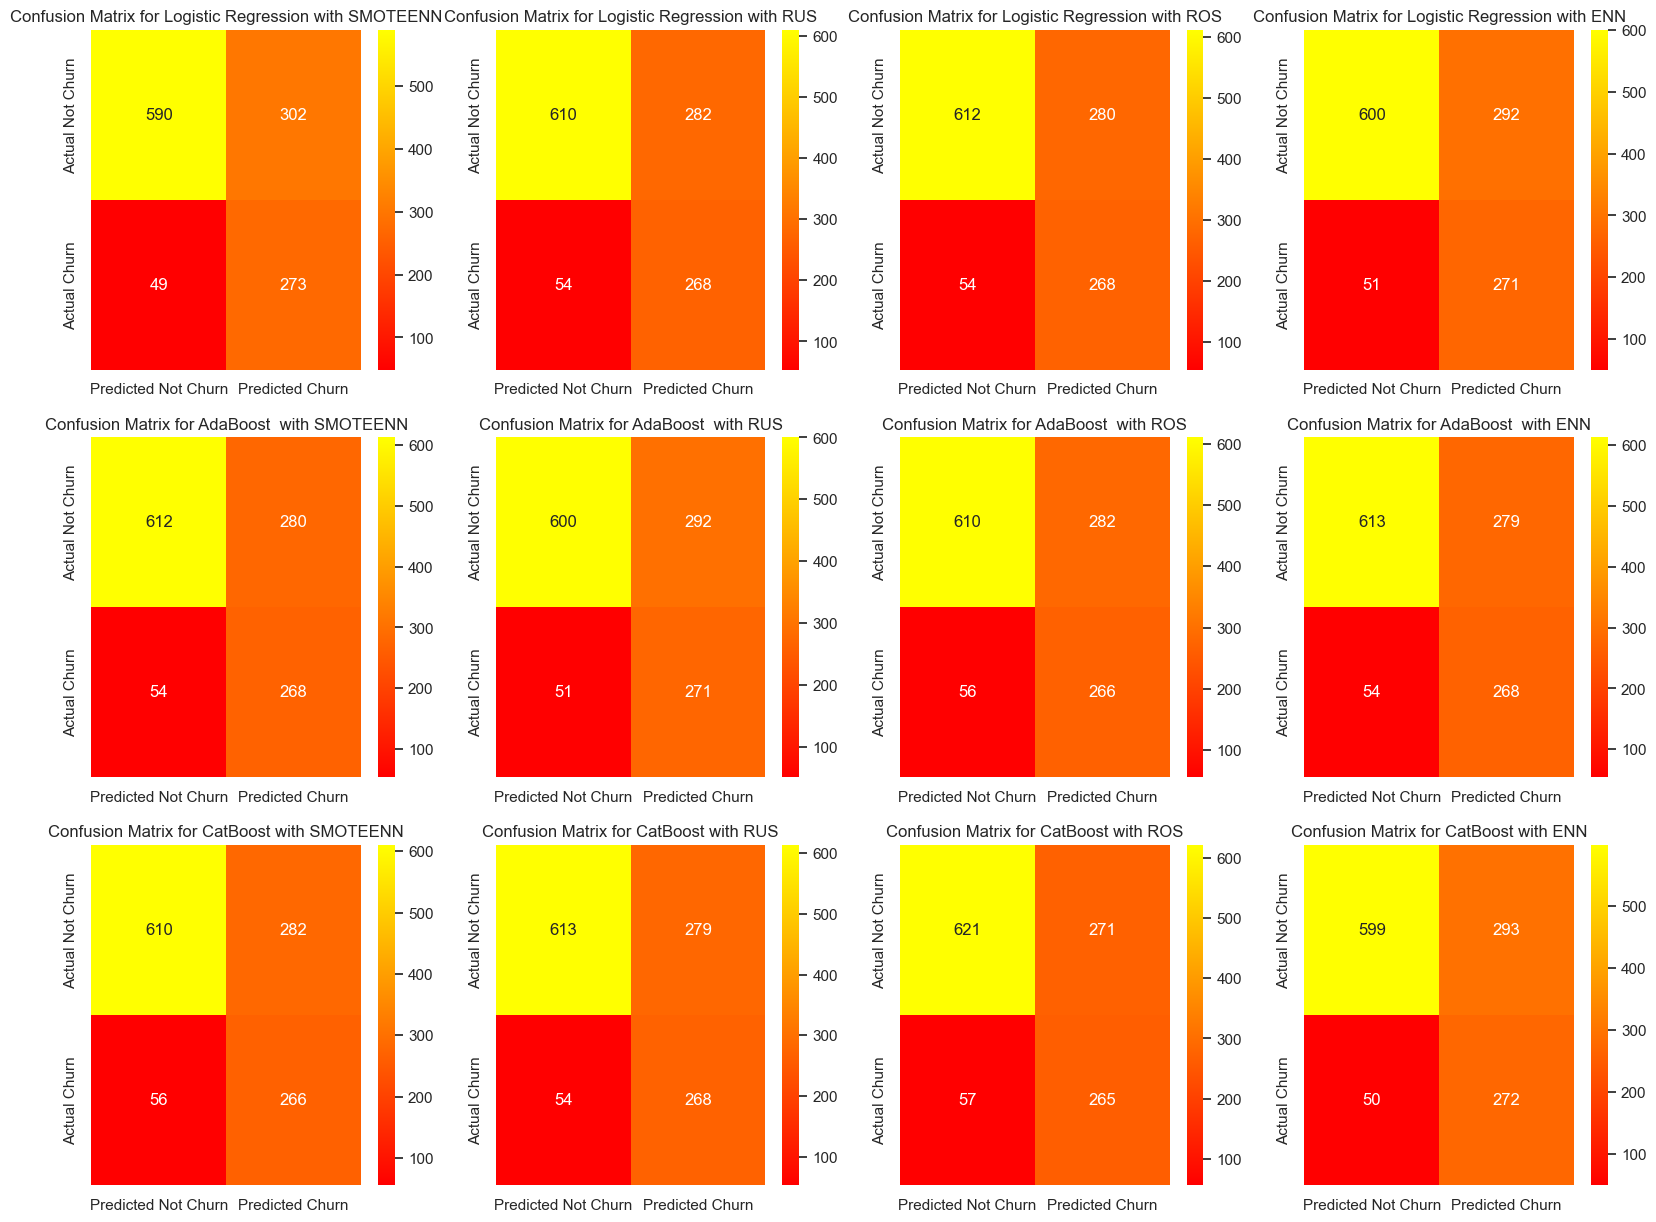

In [25]:
# Display the confusion matrix for models
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

for i, (model_name, _) in enumerate(models):
    for j, (resample_name, _) in enumerate(resamples):
        sns.heatmap(conf_matrix[2*i + j], annot=True, fmt='d', cmap='autumn',
                    xticklabels=['Predicted Not Churn', 'Predicted Churn'],
                    yticklabels=['Actual Not Churn', 'Actual Churn'], ax=axes[i][j])
        axes[i][j].set_title(f"Confusion Matrix for {model_name} with {resample_name}");



> Based on the confusion matrices and the performance metrics provided, based on recall (the ability to correctly identify all actual churns), the model of  the best choice is **Logistic Regression with SMOTEENN**. 

- **Recall**: The Logistic Regression with SMOTEENN has a recall of approximately 84.78%, which is the highest among all the models. This means it is the best at correctly identifying customers who will churn.
- **F1 Score**: It also has a competitive F1 score, which is a harmonic mean of precision and recall. A high F1 score is indicative of a balanced model with good performance in both precision and recall.

While other models may have higher accuracy or precision, the primary objective is to minimize the risk of missing any potential churn (thus maximizing recall), Logistic Regression with SMOTEENN stands out as the best choice among the options provided. This model will ensure that the maximum number of customers who are likely to churn are identified for potential retention actions. 

>Due to time efficiency and device limitations, we will focus on **hyperparameter tuning of the Logistic Regression with SMOTEENN** model, specifically targeting the Recall score, as this method has achieved the highest recall score.

# **Chapter 7: Hyperparameter Tuning**

## Grid Search Tuning
When fine-tuning the `Logistic Regression` model, we adjust several settings to optimize its performance:

1. **Penalty**: This is like setting the rules of the game for the model. It helps keep the model from focusing too much on the training data and not generalizing well to new, unseen data.

2. **C**: Think of this as the strictness of these rules. A smaller value means stricter rules, which helps ensure the model doesn't get too complicated and overfit.

3. **Solver**: This is the method the model uses to find the best way to fit the data. It's like choosing the path to solve a maze, where some paths are faster or more efficient.

4. **Max_iter**: This sets a limit on the number of attempts the model has to find the best path. It's like saying, "You have this many tries to solve the maze."

For the tuning method, we use `Grid Search`:

- Imagine checking every seat in a theater to find the best view. `Grid Search` does something similar; it methodically tries every combination of settings we're considering to find the best one. This approach is thorough but can take more time and computational power.
- We're using `Grid Search` because our data isn't excessively large, which allows us to be thorough without being overly costly, leading to more accurate and trustworthy settings for our model.

In [26]:
# Define Hyperparameter space 

hyperparam_space = {
    'model__penalty': [None, 'l2', 'l1', 'elastic-net'], #
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__solver': ['liblinear', 'saga', 'lbfgs'],
    'model__max_iter': [100, 500, 1000],
}

logreg = LogisticRegression(random_state=2024)
smoteenn = SMOTEENN(random_state=2024)

pipe_model = Pipeline([
    ('prep', transformer),
    ('resampling', smoteenn),
    ('model', logreg)
])

# Define the grid search
gridsearch = GridSearchCV(
    estimator=pipe_model,
    param_grid=hyperparam_space,  # hyperparameter space
    cv=StratifiedKFold(n_splits=5),  # cross-validation scheme 
    scoring = 'recall',   # evaluation metrics
    n_jobs = -1   # To speed up the process by utilizing multiple cores of the machine
)

gridsearch.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('min_max_scaler',
                                                                         MinMaxScaler(),
                                                                         ['tenure',
                                                                          'MonthlyCharges']),
                                                                        ('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Contract',
                                                                          'Dependents',
                                                                          'OnlineSecurity',
                                                                          'InternetService',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'PaperlessBilling'])])),
                                       ('resampling',
                                        SMOTEENN(random_state=2024)),
                                       ('model',
                                        LogisticRegression(random_state=2024))]),
             n_jobs=-1,
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'model__max_iter': [100, 500, 1000],
                         'model__penalty': [None, 'l2', 'l1', 'elastic-net'],
                         'model__solver': ['liblinear', 'saga', 'lbfgs']},
             scoring='recall')

In [27]:
# Show the chosen parameters by the Grid Search and its Train score

print('Best Hyperparameters: ', gridsearch.best_params_)
print('Best Score: ', gridsearch.best_score_)

Best Hyperparameters:  {'model__C': 0.01, 'model__max_iter': 100, 'model__penalty': 'l1', 'model__solver': 'saga'}
Best Score:  0.8384755087869238


In [28]:
# Assigning the best model grid search

logreg_tuning = gridsearch.best_estimator_
logreg_tuning.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('min_max_scaler',
                                                  MinMaxScaler(),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Contract', 'Dependents',
                                                   'OnlineSecurity',
                                                   'InternetService',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport',
                                                   'PaperlessBilling'])])),
                ('resampling', SMOTEENN(random_state=2024)),
                ('model',
                 LogisticRegression(C=0.01, penalty='l1', random_state=2024,
                                    solver='saga'))])

In [29]:
# Predict the test set using the best found model during grid search
y_pred_logreg_tuning = logreg_tuning.predict(X_test)

accuracy_logreg_tuning = accuracy_score(y_test, y_pred_logreg_tuning) * 100
precision_logreg_tuning = precision_score(y_test, y_pred_logreg_tuning) * 100
recall_logreg_tuning = recall_score(y_test, y_pred_logreg_tuning) * 100
f1_logreg_tuning = f1_score(y_test, y_pred_logreg_tuning) * 100


logreg_after_tuning = pd.DataFrame({'Recall': recall_logreg_tuning,
                                    'Accuracy': accuracy_logreg_tuning,
                                   'Precision': precision_logreg_tuning,
                                  'F1': f1_logreg_tuning}, index=['Logistic Regression After Tune'])

# Display the metrics for the Grid Search
metrics_df = metrics_df.rename(index={'Logistic Regression with SMOTEENN': 'Logistic Regression before Tune'})
metrics_df = metrics_df.loc[['Logistic Regression before Tune']]
metrics_df

metrics_df = pd.concat([logreg_after_tuning, metrics_df])
metrics_df


,Recall,Accuracy,Precision,F1
Logistic Regression After Tune,85.093168,70.263591,46.678024,60.286029
Logistic Regression before Tune,84.782609,71.087315,47.478261,60.869565


> Based on the figure above, there is an improvement in the 'recall' score following hyperparameter tuning, although this leads to a reduction in 'precision' due to the trade-off between them.

# **Chapter 8: Final Model Explanation: Logistic Regression with SMOTEENN**


## Confussion Matrix

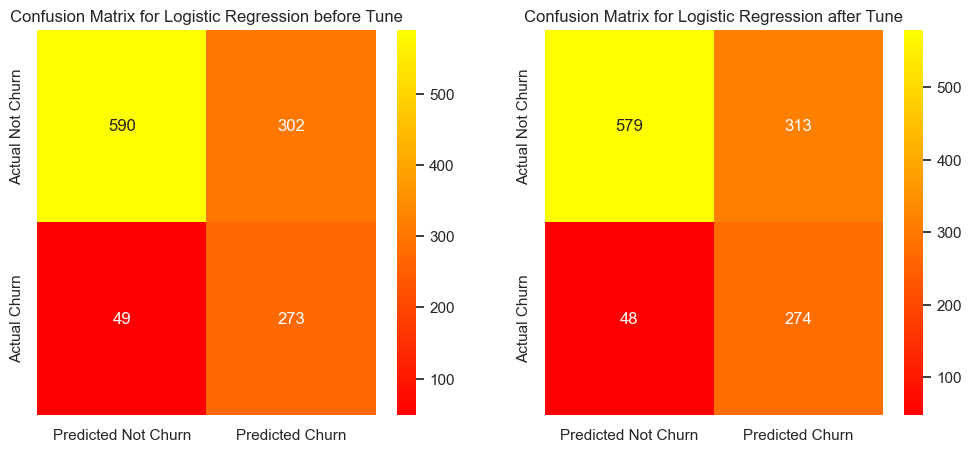

In [30]:
# Display the confusion matrix for Logistic Regression after tuning
conf_matrix_tuned = confusion_matrix(y_test, y_pred_logreg_tuning)

# Define the models and confusion matrices
logreg_models = [models[0], ('Logistic Regression', logreg_tuning)]
logreg_conf_matrices = [conf_matrix[0], conf_matrix_tuned]

# Display the confusion matrices for Logistic Regression before and after tuning
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  
for i, (name, _) in enumerate(logreg_models):
    sns.heatmap(logreg_conf_matrices[i], annot=True, fmt='d', cmap='autumn',
                xticklabels=['Predicted Not Churn', 'Predicted Churn'],
                yticklabels=['Actual Not Churn', 'Actual Churn'], ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {name}' + (' before Tune' if i < len(logreg_models) - 1 else ' after Tune'));


>The comparison of confusion matrices before and after hyperparameter tuning via GridSearch reveals a improvement in the Logistic Regression model's recall:

**Before-tuning model**, the model's ability to identify customers who would churn (**recall**) is represented by **273 True Positives** against **49 False Negatives**. This results in a **recall** of approximately **84.8%**, calculated as 273 / (273 + 49).

**After-tuning model** shows an increment in **True Positives** to **274** and a decrease in **False Negatives** to **48**. The adjusted recall is approximately **85.1%**, calculated as 274 / (274 + 48), indicating a slight improvement in the model's ability to correctly identify customers at risk of churning.

These results underscore the model's enhanced sensitivity post-tuning to churn prediction, a crucial aspect for businesses focusing on retaining customers. By improving recall, the model ensures that fewer churn cases go unnoticed, thus allowing for more targeted and effective customer retention interventions. The trade-off in precision, seen in the modest increase in False Positives, is often acceptable in scenarios where the cost of missing a churn is higher than the cost of false alarms. Therefore, the focus on recall after hyperparameter tuning demonstrates the model's alignment with proactive customer retention strategies.

## Feature Importance 

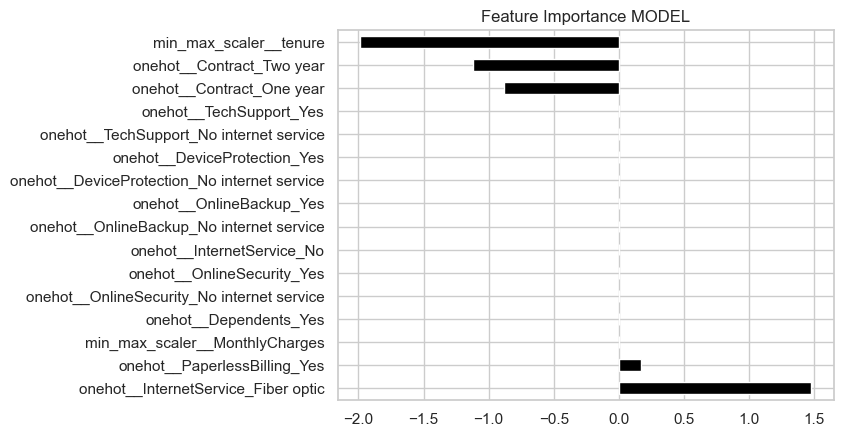

In [31]:
# Final Model features importance
coef = pd.Series(logreg_tuning['model'].coef_[0], transformer.get_feature_names_out()).sort_values(ascending = False)
coef.plot(kind='barh', title='Feature Importance MODEL', color='black');


> Interpretation

**Negative Influence (Features reducing likelihood of churn):**
- **Tenure**: Customers with a longer tenure are less likely to churn. The negative coefficient for 'tenure' suggests that as customers stay longer with the service, their propensity to leave decreases.
- **Contract Type**: The negative coefficients for 'Contract_Two year' and 'Contract_One year' imply that customers with longer contractual commitments are less prone to churn, indicating that stable, long-term agreements lead to better customer retention.

**Positive Influence (Features increasing likelihood of churn):**
- **Fiber Optic Internet Service**: The positive coefficient for 'InternetService_Fiber optic' suggests customers with this type of internet service are more likely to churn. This could be due to various reasons such as price, service quality, or competitive offers from other providers.
- **Paperless Billing**:  The chart actually shows a positive coefficient for 'PaperlessBilling_Yes', which means that opting for paperless billing is increasing likelihood of churn.

> the model indicates that long-term contracts and extended tenure with the service provider are strong indicators of customer loyalty, while fiber optic service, which may be perceived as premium, surprisingly corresponds to a higher churn rate. However, the negative coefficient for paperless billing suggests that customers who are engaged with digital billing methods are less likely to churn. It's important for the service provider to consider these insights to develop targeted strategies for customer retention.

## **Cost Saving Calculation**:

#### **Without Machine Learning Model:**
- Assuming we try to retain all customers due to the risk of churn with actual data, the cost is **$1** per customer for **1214 Customer**.
- Total customers = 1214
- Churned Customers = 328; Non-Churned Customer = 886
- Total Retention Cost = Total customers × $1.
- Acquisition Cost = 328 x 5 = 4430
- **Total Cost = $5644**

#### **With Machine Learning Model:**
- We only attempt to retain customers predicted to churn (TP + FP).
- False negatives represent churned customers requiring acquisition.
- Total Cost = (TP × Retention Cost) + (FP × Retention Cost) + (FN × Acquisition Cost).

Let's apply these calculations to final model:

- True Positives (TP): 274 customers correctly identified as churning.
- False Positives (FP): 313 customers incorrectly identified as churning.
- False Negatives (FN): 48 customers incorrectly identified as not churning.

#### Calculated Costs:
- Retention Cost per customer: $1.
- Acquisition Cost per customer: $5 (since it's five times the retention cost).(Paid when registration process)

#### Final Cost Calculation:
- Total Cost with ML Model = (TP × $1) + (FP × $1) + (FN × $5) + (TN × $5 ).
- Total Cost with ML Model = (274 × $1) + (313 × $1) + (48 × $5) + (48 × $5).
- Total Cost With ML Model = $3722

>### Final Cost Saving Summary:

 Without Machine Learning Model Retention Cost: **$5644**.

 With Machine Learning Model total Cost: **$3722**.

> **By applying the machine learning model, the retention and acquisition costs are reduced as much as **$1922 (34% of total cost)**, resulting in a total cost of $3722 compared to $5644 without the model. This demonstrates a cost saving through the use of the machine learning model.**

## **Logistic Regression and SMOTEENN overview**
> Before we move on to the conclusion of this project, Here are the explaination about what Logistic Regression and SMOTEENN are.

### What is Logistic Regression?

Logistic regression is a way to predict the chance of a 'yes' or 'no' outcome, like whether someone will buy a product (yes or no), or if a patient has a disease (yes or no). It's quite popular because it's simple and effective. logistic regression is a way to draw a line that best separates two groups, like separating apples from oranges based on their weight and color. For logistic regression, this line helps us decide if a new piece of data, like an email, is more like the apples (not spam) or like the oranges (spam).

**Different Kinds**

Logistic regression is not always binomial like explained above; it has a few different types:

- **Binomial**: Like deciding if a coin flip comes up heads or tails.
- **Multinomial**: More like rolling a dice with many sides.
- **Ordinal**: Imagine rating a movie with stars from one to five.

**How It Works**

- **Sigmoid Function**: This is a special curve that squishes any number into a range between 0 and 1, making it perfect for probabilities.
- **Estimating Coefficients**: We find the best numbers to multiply each of our data points by to predict our outcome.
- **Probability Prediction**: Using these coefficients, we can figure out the chance of our 'yes' or 'no' result.
- **Setting a Threshold**: We pick a cutoff point, like 50%, to decide what chance is high enough to say 'yes'.
- **Features and Variables**: Logistic regression can take in many different factors, like age or income, to make a prediction.
- **Model Evaluation**: We check how well our model does at making predictions with tools like accuracy or the confusion matrix.

**Pros and Cons**

- *Pros*: It's straightforward, it gives you probabilities, and it’s great for 'yes' or 'no' questions.
- *Cons*: It's not the best when things get really complicated or when the relationship between the data isn’t a straight line.

### What is SMOTEENN?

SMOTEENN combines two techniques — SMOTE and Edited Nearest Neighbors (ENN) — to deal with imbalanced datasets, particularly in classification problems. It's like having a class with far more boys than girls and trying to ensure that in group activities, everyone has an equal chance to participate.

**In Simple Terms**

Imagine you're a teacher with a classroom that has 30 boys and only 10 girls. If you want to create groups that have an equal number of boys and girls, you might:

- First, create some "virtual" girls based on the interests and characteristics of the girls you already have. That's what SMOTE does: it creates new, synthetic samples that are similar to the minority class.
- Then, you might find that some boys are very similar to the girls. To make the groups even more equal, you decide to remove these boys from the group. That's the ENN part: it removes samples that are too close to the other class.

**How It Works**

- **SMOTE (Synthetic Minority Over-sampling Technique)**: It creates additional synthetic examples from the minority class to balance the dataset.
- **ENN (Edited Nearest Neighbors)**: It cleans up the data by removing any examples from the majority class that have the closest neighbors from the minority class.
- **Combination**: By combining these two, you get a more balanced and cleaner dataset that helps machine learning models learn better.

**Uses**

SMOTEENN is especially useful in situations where you have a lot of data for one class (like customers who didn't churn) and not much for another (like customers who did churn). It helps give a more balanced view so that when you're predicting new data, you're not biased toward the majority class.

**Pros and Cons**

- *Pros*: SMOTEENN is good for balancing classes and cleaning noisy data, which can help make better predictions.
- *Cons*: It can create too many synthetic samples or remove too many useful ones if not carefully tuned. Plus, it can be a bit slow on very large datasets.

# **Chapter 9: Conclusions**

## Final Model Score
 The final model, **The Logistic Regression With SMOTEENN** is the best model compare with other modelling methods, with **recall score before tuning = 84,78** . This model shows **True Positives = 274** and **False Negatives = 48**. The Final recall score is **85.1%**, calculated as 274 / (274 + 48), indicating model's ability to correctly identify customers at risk of churning.<br>
This model is only applicable within the range of data used for this modeling, which includes:
- Tenure between 0 to 72 months
- Monthly Charges between $18.8 and $118.65
- Contracts of Month-to-month, One year, and Two Year durations
- Internet Service types 'DSL', 'Fiber Optic', and 'No'
- Dependents, Paperless Billing with a 'Yes' or 'No' value
- Online Security, Online Backup, Device Protection, and Tech Support with options of 'Yes', 'No', or 'No internet service'.
> Parameters outside of the variables mentioned above are not valid for the final model that has been created.

## Factors that influence customer retention

Longer customer tenure and multi-year contracts reduce churn, indicating loyalty. Surprisingly, fiber optic users churn more, potentially due to costs or competition. Customers using paperless billing are more likely to leave, suggesting that digital engagement correlates with retention

## Cost Savings:

 Without Machine Learning Model Retention Cost: **$5644**.

 With Machine Learning Model total Cost: **$3722**.

> By applying the machine learning model, the retention and acquisition costs are reduced as much as **$1922 (34% of total cost)**, resulting in a total cost of $3722 compared to $5644 without the model. This demonstrates a cost saving through the use of the machine learning model.

# **Chapter 10: Reccomendation**
## For Business
- **Loyalty program**: Implement a loyalty reward program for customers based on the length of `tenure` to encourage increased loyalty.

- **Encourage Longer Contracts**: Since longer `contracts` (one and two years) `negatively influence` churn, consider offering incentives to customers to encourage commitment to longer-term contracts.

- **Review Fiber Optic Service**: The positive influence of `fiber optic service on churn indicates that customers may not be fully satisfied`. Investigate the reasons (such as price or service reliability) and consider improvements or changes in pricing strategies.

- **Understand Paperless Billing Dynamics:** Given that `paperless billing `is `positively influencing churn`, assess how customers feel about it. Make sure that the process of managing accounts digitally is communicated clearly and provide assistance to those who find the transition challenging.

- **Personalized Customer Engagement**: Develop personalized engagement strategies tailored to individual customer profiles. This can include targeted communication, personalized offers, and services designed to address the specific needs and preferences identified through data analysis.

- **Offer attractive promotions** to customers who are indicated by the machine learning model to be at risk of switching or churning.
- **Service Quality Improvement**: Assess the quality of the services provided, identify areas where customers face issues, and work on enhancing those areas. This could include improving network reliability, customer service responsiveness, and billing transparency.

- **Feedback Loop Implementation**: Establish a feedback loop with customers to gather insights on their satisfaction and to identify potential service improvements. Use this feedback to make data-driven decisions and to preemptively address factors that may lead to churn.

## For Machine Learning:
- **Exploring Different Modeling Techniques, Resampling, and Hyperparameter Tuning**: Try different modeling methods, resampling techniques (such as SMOTENC), and hyperparameter tuning to improve model performance.

- **Continuous Monitoring and Updating**: Consistently monitor the model's performance and update it with new data to keep its predictive power accurate. 

- **Customer Demographics**: Include data on customer demographics like age, gender, occupation, and education level. Understanding a customer's demographic profile can offer deeper insights into their preferences and behaviors, which aids in predicting churn more effectively. For example, older customers might prioritize stability, trustworthiness, and a long-standing reputation when selecting a service provider, associating a company's longevity with reliability and service quality.

- **Enhancing Data for the Minority Class (Churn)**: Adding data, especially for the minority class (Churn), to help improve the model's performance.



